In [2]:
import numpy as np
import pandas as pd

from solvers import minibatch_gd_fixed, minibatch_gd_decreasing
from ml_utils import get_accuracy, optim_data, plot_loss, plot_accuracy

# Apple quality dataset

In [3]:
# load with constant column
X_train_apple = pd.read_csv("datasets/apple_quality/apple_X_train.csv").values
y_train_apple = pd.read_csv("datasets/apple_quality/apple_y_train.csv").values.reshape(-1)
X_test_apple = pd.read_csv("datasets/apple_quality/apple_X_test.csv").values
y_test_apple = pd.read_csv("datasets/apple_quality/apple_y_test.csv").values.reshape(-1)

In [4]:
X_train_apple = np.hstack((np.ones((X_train_apple.shape[0],1)), X_train_apple))
X_test_apple = np.hstack((np.ones((X_test_apple.shape[0],1)), X_test_apple))

In [5]:
print(f"""
Apple quality dataset
X_train = {X_train_apple.shape}
X_test = {X_test_apple.shape}""")


Apple quality dataset
X_train = (3084, 8)
X_test = (772, 8)


In [6]:
# intercept initial guess already added
w0 = np.array([-4, 3, -1, 1, 0, 2, 2.5, -1])

## MiniGD fixed and decreasing

In [7]:
models1 = []
M1 = 32

In [8]:
sgd_fixed_1 = minibatch_gd_fixed(w0, 0.1, M1, X_train_apple, y_train_apple)
sgd_fixed_1.accuracy_train = get_accuracy(sgd_fixed_1, X_train_apple, y_train_apple)
sgd_fixed_1.accuracy_test = get_accuracy(sgd_fixed_1, X_test_apple, y_test_apple)
models1.append(sgd_fixed_1)

sgd_fixed_2 = minibatch_gd_fixed(w0, 0.01, M1, X_train_apple, y_train_apple)
sgd_fixed_2.accuracy_train = get_accuracy(sgd_fixed_2, X_train_apple, y_train_apple)
sgd_fixed_2.accuracy_test = get_accuracy(sgd_fixed_2, X_test_apple, y_test_apple)
models1.append(sgd_fixed_2)

sgd_fixed_3 = minibatch_gd_fixed(w0, 0.001, M1, X_train_apple, y_train_apple)
sgd_fixed_3.accuracy_train = get_accuracy(sgd_fixed_3, X_train_apple, y_train_apple)
sgd_fixed_3.accuracy_test = get_accuracy(sgd_fixed_3, X_test_apple, y_test_apple)
models1.append(sgd_fixed_3)

In [9]:
sgd_decre_1 = minibatch_gd_decreasing(w0, 1, M1, X_train_apple, y_train_apple)
sgd_decre_1.accuracy_train = get_accuracy(sgd_decre_1, X_train_apple, y_train_apple)
sgd_decre_1.accuracy_test = get_accuracy(sgd_decre_1, X_test_apple, y_test_apple)
models1.append(sgd_decre_1)

sgd_decre_2 = minibatch_gd_decreasing(w0, 0.1, M1, X_train_apple, y_train_apple)
sgd_decre_2.accuracy_train = get_accuracy(sgd_decre_2, X_train_apple, y_train_apple)
sgd_decre_2.accuracy_test = get_accuracy(sgd_decre_2, X_test_apple, y_test_apple)
models1.append(sgd_decre_2)

sgd_decre_3 = minibatch_gd_decreasing(w0, 0.01, M1, X_train_apple, y_train_apple)
sgd_decre_3.accuracy_train = get_accuracy(sgd_decre_3, X_train_apple, y_train_apple)
sgd_decre_3.accuracy_test = get_accuracy(sgd_decre_3, X_test_apple, y_test_apple)
models1.append(sgd_decre_3)

In [10]:
sgd_data_1 = optim_data(models1)
sgd_data_1

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Termination,Train accuracy,Test accuracy
0,MiniGD-fixed,32,0.100,0,3074.877623,149.217325,0.402201,Max epochs exceeded,0.495785,0.516839
1,MiniGD-fixed,32,0.010,0,3071.604318,137.461130,0.374583,Max epochs exceeded,0.573930,0.580311
2,MiniGD-fixed,32,0.001,0,3071.649154,137.878362,0.472377,Max epochs exceeded,0.655966,0.646373
3,MiniGD-decreasing,32,1.000,0,3071.630122,137.684532,0.420511,Max epochs exceeded,0.624514,0.628238
4,MiniGD-decreasing,32,0.100,0,3071.649748,137.899563,0.470327,Max epochs exceeded,0.658560,0.647668
5,MiniGD-decreasing,32,0.010,0,3069.873398,137.864112,0.413594,Max epochs exceeded,0.667315,0.664508


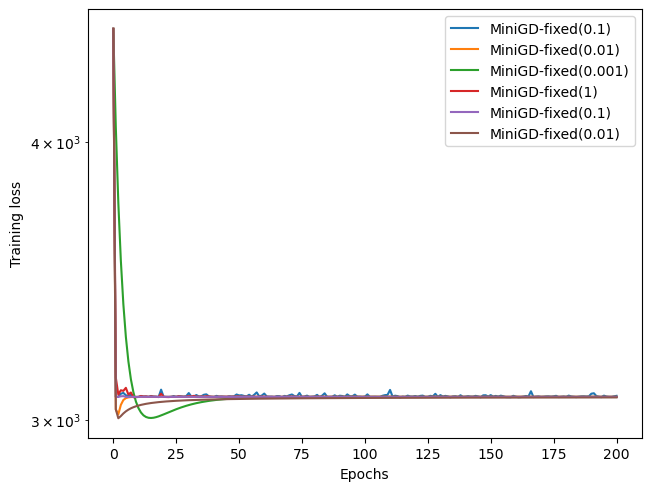

In [11]:
plot_loss(models1, [f"MiniGD-fixed({model.step_size})" for model in models1])

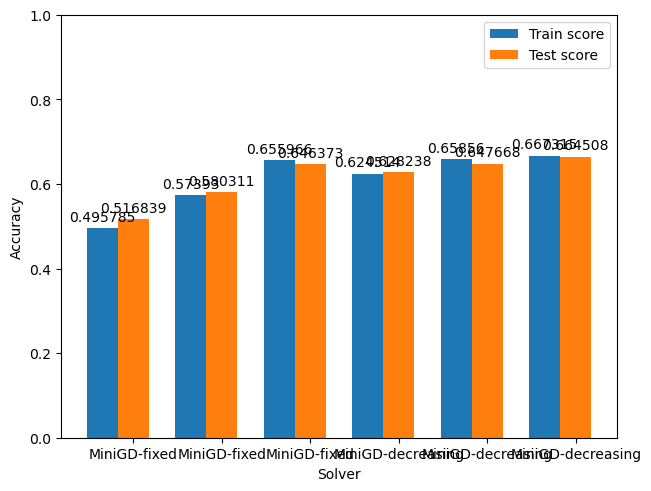

In [12]:
plot_accuracy(models1)